# Centers for Disease Control:  Multiple Causes of Death (MCOD)

## Data Cleaning & EDA

CDC site:  https://www.cdc.gov/nchs/data_access/vitalstatsonline.htm

CDC data set user guide:  https://www.cdc.gov/nchs/data/dvs/multiple_cause_record_layout_2015.pdf

CSV download **(PLEASE DOWNLOAD & SAVE as './assets/mort15.csv')**:  http://www.nber.org/data/vital-statistics-mortality-data-multiple-cause-of-death.html

In [1]:
import pandas as pd
import numpy as np
import calendar
import datetime

from scipy.stats import gaussian_kde
from scipy.spatial import distance

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=5, suppress=True)

In [2]:
start = datetime.datetime.now()
print start

mort = pd.read_csv('./assets/mort2015.csv', dtype={
        
'restatus'  :     'int64',
'educ1989'  :   'float64',
'educ2003'  :   'float64',
'educflag'  :     'int64',
'monthdth'  :     'int64',
'sex'       :    'object',
'age'       :     'int64',
'ageflag'   :   'float64',
'ager52'    :     'int64',
'ager27'    :     'int64',
'ager12'    :     'int64',
'ager22'    :   'float64',
'placdth'   :     'int64',
'marstat'   :    'object',
'weekday'   :     'int64',
'year'      :     'int64',
'injwork'   :    'object',
'mandeath'  :   'float64',
'methdisp'  :    'object',
'autopsy'   :    'object',
'activity'  :   'float64',
'injury'    :   'float64',
'ucod'      :    'object',
'ucr358'    :     'int64',
'ucr113'    :     'int64',
'ucr130'    :   'float64',
'ucr39'     :     'int64',
'eanum'     :     'int64',
'econdp_1'  :     'int64',
'econds_1'  :     'int64',
'enicon_1'  :    'object',
'econdp_2'  :   'float64',
'econds_2'  :   'float64',
'enicon_2'  :    'object',
'econdp_3'  :   'float64',
'econds_3'  :   'float64',
'enicon_3'  :    'object',
'econdp_4'  :   'float64',
'econds_4'  :   'float64',
'enicon_4'  :    'object',
'econdp_5'  :   'float64',
'econds_5'  :   'float64',
'enicon_5'  :    'object',
'econdp_6'  :   'float64',
'econds_6'  :   'float64',
'enicon_6'  :    'object',
'econdp_7'  :   'float64',
'econds_7'  :   'float64',
'enicon_7'  :    'object',
'econdp_8'  :   'float64',
'econds_8'  :   'float64',
'enicon_8'  :    'object',
'econdp_9'  :   'float64',
'econds_9'  :   'float64',
'enicon_9'  :    'object',
'econdp_10' :   'float64',
'econds_10' :   'float64',
'enicon_10' :    'object',
'econdp_11' :   'float64',
'econds_11' :   'float64',
'enicon_11' :    'object',
'econdp_12' :   'float64',
'econds_12' :   'float64',
'enicon_12' :    'object',
'econdp_13' :   'float64',
'econds_13' :   'float64',
'enicon_13' :    'object',
'econdp_14' :   'float64',
'econds_14' :   'float64',
'enicon_14' :    'object',
'econdp_15' :   'float64',
'econds_15' :   'float64',
'enicon_15' :    'object',
'econdp_16' :   'float64',
'econds_16' :   'float64',
'enicon_16' :   'float64',
'econdp_17' :   'float64',
'econds_17' :   'float64',
'enicon_17' :   'float64',
'econdp_18' :   'float64',
'econds_18' :   'float64',
'enicon_18' :   'float64',
'econdp_19' :   'float64',
'econds_19' :   'float64',
'enicon_19' :   'float64',
'econdp_20' :   'float64',     
'econds_20' :   'float64',
'enicon_20' :   'float64',
'ranum'     :     'int64',
'record_1'  :    'object',
'record_2'  :    'object',
'record_3'  :    'object',
'record_4'  :    'object',
'record_5'  :    'object',
'record_6'  :    'object',
'record_7'  :    'object',
'record_8'  :    'object',
'record_9'  :    'object',
'record_10' :    'object',
'record_11' :    'object',
'record_12' :    'object',
'record_13' :    'object',
'record_14' :    'object',
'record_15' :    'object',
'record_16' :   'float64',
'record_17' :   'float64',
'record_18' :   'float64',
'record_19' :   'float64',
'record_20' :   'float64',
'race'      :     'int64',
'brace'     :   'float64',
'raceimp'   :   'float64',
'racer3'    :     'int64',
'racer5'    :     'int64',
'hispanic'  :     'int64',
'hspanicr'  :     'int64',
}
                  )

end = datetime.datetime.now()
print (end - start)

2017-04-04 20:48:03.430048
0:00:23.790764


In [3]:
orig_len = len(mort)

orig_len

2718198

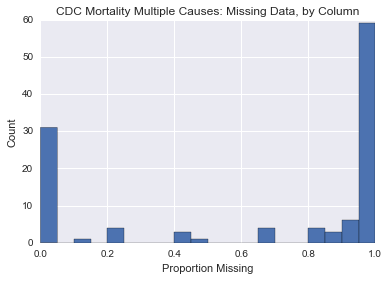

In [4]:
missing = pd.DataFrame(mort.isnull().sum(), columns = ['proportion'])

missing = missing.applymap(lambda x: x/float(len(mort))).\
                sort_values(by = 'proportion', ascending = False)
    
missing['proportion'].hist(bins = 20)

plt.title('CDC Mortality Multiple Causes: Missing Data, by Column')
plt.xlabel('Proportion Missing')
plt.ylabel('Count')
plt.show()
del missing

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Looks like some columns may be missing all values; let's get rid of those:

In [5]:
the_nulls = pd.DataFrame(mort.isnull().sum(), columns = ['count'])/len(mort)

mort = mort[the_nulls[the_nulls['count'] != 1.0].index]

del the_nulls

In [6]:
mort.head(2)

,restatus,educ1989,educ2003,educflag,monthdth,sex,age,ageflag,ager52,ager27,...,record_13,record_14,record_15,race,brace,raceimp,racer3,racer5,hispanic,hspanicr
0,1,NaN,3.0,1,1,M,1084,NaN,42,22,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
1,1,NaN,6.0,1,1,M,1070,NaN,40,20,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6


## Clean column-by-column

### Resident Status ('restatus')

United States Occurrence

1 ... RESIDENTS

State and County of Occurrence and Residence are the same.

2 ... INTRASTATE NONRESIDENTS

State of Occurrence and Residence are the same, but County is different.

3 ... INTERSTATE NONRESIDENTS

State of Occurrence and Residence are different, but both are in the U.S.

4 ... FOREIGN RESIDENTS

State of Occurrence is one of the 50 States or the District of Columbia,
but Place of Residence is outside of the U.S.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Let's update the values in the resident status column, which we'll probably dummify later:

In [7]:
res_dict = {
    1 : 'resident',
    2 : 'intrastate_nonres',
    3 : 'interstate_nonres',
    4 : 'foreign'
}

mort.loc[:, 'restatus'] = [res_dict[x] for x in mort['restatus']]

mort['restatus'].value_counts()/len(mort)

resident             0.808290
intrastate_nonres    0.158769
interstate_nonres    0.030893
foreign              0.002048
Name: restatus, dtype: float64

### Education Level ('educ1989', 'educ2003', 'educflag')

Education (2003 revision)

Field is blank for registration areas that are using the 1989 revision format of the item.

1 ... 8th grade or less

2 ... 9 - 12th grade, no diploma

3 ... high school graduate or GED completed

4 ... some college credit, but no degree

5 ... Associate degree

6 ... Bachelor’s degree

7 ... Master’s degree

8 ... Doctorate or professional degree

9 ... Unknown

In [8]:
mort['educflag'].value_counts()

1    2645155
0      73043
Name: educflag, dtype: int64

In [9]:
mort['educflag'].isnull().sum()

0

In [10]:
mort.loc[mort['educ2003'].isnull(), 'educ1989'].value_counts().head()

12.0    31736
14.0     6938
16.0     5365
8.0      4471
10.0     4239
Name: educ1989, dtype: int64

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Unfortunately, in order to switch 'educ1989' column values to 'educ2003' column values, we need to know whether the deceased person had received a high school diploma/GED after four years of secondary school.  Since we don't -- and since those are most of the ones missing -- let's remove all of these from the data set.  Now, we will have only observations with 'educ2003' encoding.

In [11]:
mort = mort[mort['educflag'] == 1]

In [14]:
mort = mort[mort['educ2003'] != 9]

In [15]:
len(mort)/float(orig_len)

0.929043432450469

In [16]:
mort.drop(['educ1989', 'educflag'], axis = 1, inplace = True)

### Month of Death

In [17]:
mort['monthdth'] = [calendar.month_name[x] for x in mort['monthdth']]

mort['monthdth'].value_counts()

January      253608
March        229880
December     215987
February     215244
April        208738
May          206252
October      205964
November     202744
July         200606
August       197895
June         195192
September    193214
Name: monthdth, dtype: int64

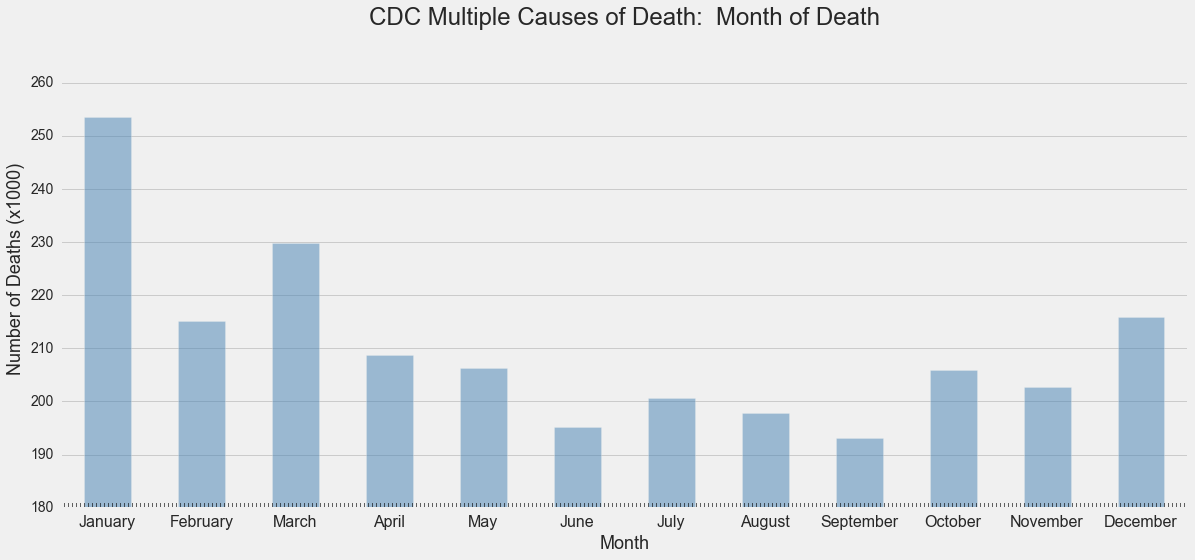

In [21]:
plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')

monthdth = pd.DataFrame(mort['monthdth'].value_counts()).reindex(index = [
        'January',
        'February',
        'March',
        'April',
        'May',
        'June',
        'July',
        'August',
        'September',
        'October',
        'November',
        'December'
        ]
                                                                 )
(monthdth['monthdth']/1000).plot.bar(color = 'steelblue', alpha = 0.5)

plt.axhline(180, ls = ':', lw = 10, color = 'k', alpha = 0.6)

plt.title('CDC Multiple Causes of Death:  Month of Death', fontsize = 24, y = 1)

plt.ylabel('Number of Deaths (x1000)', fontsize = 18)
plt.yticks(range(180, 270, 10), fontsize = 14)
plt.ylim([180, 270])
plt.xlabel('Month', fontsize = 18)
plt.xticks(fontsize = 16, rotation = 0)

plt.grid(which='major', axis = 'x')

plt.show()

### Sex

In [22]:
mort['sex'] = [1 if x == 'M' else 0 for x in mort['sex']]

mort['sex'].value_counts()

1    1276322
0    1249002
Name: sex, dtype: int64

### Age

In [23]:
len(mort[mort['age'] == 9999])  ## unknowns

29

In [24]:
mort[mort['age'] == 9999][[u'ageflag', u'ager52', u'ager27', u'ager12', u'ager22']].head()

,ageflag,ager52,ager27,ager12,ager22
146665,NaN,52,27,12,NaN
146666,NaN,52,27,12,NaN
581871,NaN,52,27,12,NaN
1195521,NaN,52,27,12,NaN
1539788,NaN,52,27,12,NaN


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Seems like all age information is, indeed, missing for the '9999' observations.  We'll get rid of them:

In [25]:
mort = mort[mort['age'] != 9999]

In [26]:
len(mort)/float(orig_len)

0.9290327636176614

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Let's also just keep the ages listed in years (i.e., no ages less than one year):

In [27]:
mort = mort[(mort['age'] < 1999) & (mort['age'] > 1000)]

mort.loc[:, 'age'] = [x%1000 for x in mort['age']]

In [28]:
len(mort)/float(orig_len)

0.9215774568298557

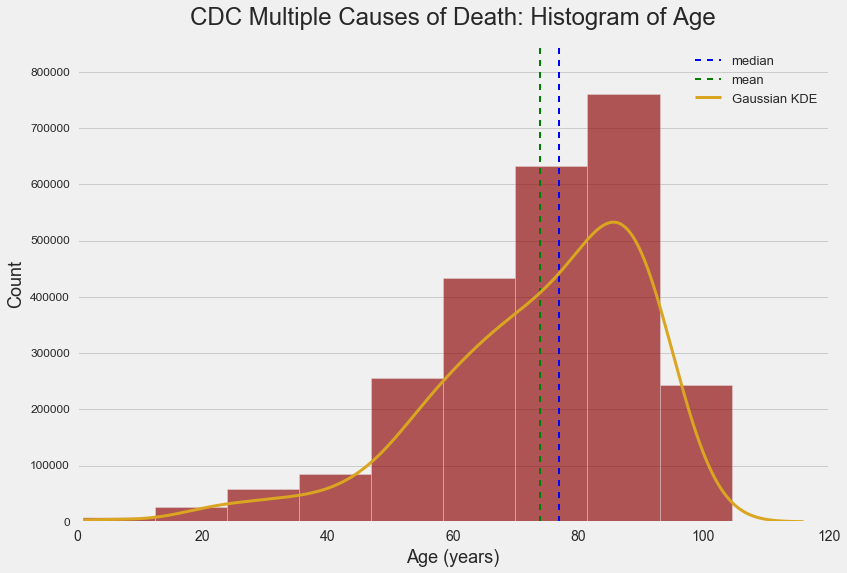

In [29]:
plt.figure(figsize = (12, 8))

mort['age'].hist(color = 'darkred', alpha = 0.65)

plt.axvline(mort['age'].median(), color = 'blue', linestyle = '--', label = 'median', lw = 2)
plt.axvline(mort['age'].mean(), color = 'green', linestyle = '--', label = 'mean', lw = 2)

plt.title('CDC Multiple Causes of Death: Histogram of Age', fontsize = 24, y = 1.03)

plt.xticks(fontsize = 14)
plt.xlabel('Age (years)', fontsize = 18)
plt.yticks(fontsize = 12)
plt.ylabel('Count', fontsize = 18)
plt.ylim([0, 850000])

density = gaussian_kde(mort['age'])
xs = np.linspace(mort['age'].min(), mort['age'].max(), 1000)
density.covariance_factor = lambda : 0.25
density._compute_covariance()
plt.plot(xs,density(xs)*100000000/5, linewidth = 3.0, label = 'Gaussian KDE', color = 'goldenrod')

plt.legend(loc = 'best', fontsize = 13)

plt.grid(which='major', axis = 'x')

plt.show()

In [30]:
mort.drop([u'ageflag', u'ager52', u'ager27', u'ager12', u'ager22'], axis = 1, inplace = True)

### Place of death

Place of Death and Decedent’s Status

1 ... Hospital, clinic or Medical Center - Inpatient

2 ... Hospital, Clinic or Medical Center - Outpatient or admitted to Emergency Room

3 ... Hospital, Clinic or Medical Center - Dead on Arrival

4 ... Decedent’s home

5 ... Hospice facility

6 ... Nursing home/long term care

7 ... Other

9 ... Place of death unknown

In [31]:
len(mort[mort['placdth'] == 9])/float(len(mort))

0.0004195558536225115

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Fewer than 0.04% of observations have unknown place of death, so we'll get rid of those:

In [32]:
mort = mort[mort['placdth'] != 9]

In [33]:
len(mort)/float(orig_len)

0.9211908036132761

In [34]:
placdth_dict = {
    1 : 'inpatient',
    2 : 'outpatient_or_ER',
    3 : 'dead_on_arrival',
    4 : 'at_home',
    5 : 'hospice',
    6 : 'nursing_home',
    7 : 'other_location'
}

mort.loc[:, 'placdth'] = [placdth_dict[x] for x in mort['placdth']]

In [35]:
mort['placdth'].value_counts()/len(mort)

at_home             0.299177
inpatient           0.292328
nursing_home        0.199335
hospice             0.080658
outpatient_or_ER    0.063713
other_location      0.060295
dead_on_arrival     0.004492
Name: placdth, dtype: float64

### Marital status

S ... Never married, single

M ... Married

W ... Widowed

D ... Divorced

U ... Marital Status unknown

In [36]:
mort['marstat'].value_counts()/len(mort)

M    0.375844
W    0.342966
D    0.157708
S    0.120679
U    0.002804
Name: marstat, dtype: float64

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We'll take out any observations with unknown marital status:

In [37]:
mort = mort[mort['marstat'] != 'U']

In [38]:
len(mort)/float(orig_len)

0.9186082102922598

In [39]:
marstat_dict = {
    'S' : 'single_nevermarried',
    'M' : 'married',
    'W' : 'widowed',
    'D' : 'divorced'
}

mort.loc[:, 'marstat'] = [marstat_dict[x] for x in mort['marstat']]

### Day of the week

In [40]:
mort['weekday'].value_counts()/len(mort)

5    0.145011
7    0.143659
6    0.143406
2    0.142491
1    0.142237
3    0.141716
4    0.141430
9    0.000050
Name: weekday, dtype: float64

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Get rid of unknowns:

In [41]:
mort = mort[mort['weekday'] != 9]

In [42]:
len(mort)/float(orig_len)

0.9185618560531646

In [43]:
weekday_dict = {
    1 : 'Sunday',
    2 : 'Monday',
    3 : 'Tuesday',
    4 : 'Wednesday',
    5 : 'Thursday', 
    6 : 'Friday',
    7 : 'Saturday'
}

mort.loc[:, 'weekday'] = [weekday_dict[x] for x in mort['weekday']]

In [44]:
mort['weekday'].value_counts()/len(mort)

Thursday     0.145018
Saturday     0.143666
Friday       0.143413
Monday       0.142498
Sunday       0.142245
Tuesday      0.141723
Wednesday    0.141438
Name: weekday, dtype: float64

### Year

In [45]:
mort['year'].value_counts()

2015    2496833
Name: year, dtype: int64

In [46]:
mort.drop('year', axis = 1, inplace = True)

### Work injury

In [47]:
mort['injwork'].value_counts()

U    2298741
N     194102
Y       3990
Name: injwork, dtype: int64

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;It would be interesting to look into the known values, here.  We won't do anything with this, for now.

In [48]:
mort.drop('injwork', axis = 1, inplace = True)

### Manner of death

1 ... Accident

2 ... Suicide

3 ... Homicide

4 ... Pending investigation

5 ... Could not determine

6 ... Self-Inflicted

7 ... Natural

Blank ... Not specified

In [49]:
mort['mandeath'].value_counts()/len(mort)

7.0    0.771433
1.0    0.053150
2.0    0.016764
3.0    0.006982
5.0    0.003102
4.0    0.001258
Name: mandeath, dtype: float64

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Unclear what the difference is between 'suicide' and 'self-inflicted'; there are no 6s in the set at this point, though.  We'll take out 4s and 5s -- whose true values are likely not evenly distributed among the remaining values -- and keep 'accident,' 'suicide,' 'homicide,' and 'natural':

In [50]:
mort = mort[(mort['mandeath'] != 4) & (mort['mandeath'] != 5)]

In [51]:
len(mort)/float(orig_len)

0.9145569969516569

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Let's see what proportion of observations are not specified/missing a value in this column:

In [52]:
mort['mandeath'].isnull().sum()/float(len(mort))

0.14795609077747837

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Not _too_ many; let's take them out:

In [53]:
mort = mort[mort['mandeath'].notnull()]

In [54]:
len(mort)/float(orig_len)

0.7792427188894996

In [55]:
mandeath_dict = {
    1 : 'accident',
    2 : 'suicide',
    3 : 'homicide',
    7 : 'natural'
}

mort.loc[:, 'mandeath'] = [mandeath_dict[x] for x in mort['mandeath']]

In [56]:
mort['mandeath'].value_counts()/len(mort)

natural     0.909356
accident    0.062652
suicide     0.019761
homicide    0.008230
Name: mandeath, dtype: float64

### Method of disposal

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We're not concerned with this right now.

In [57]:
mort.drop('methdisp', axis = 1, inplace = True)

### Autopsy 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We're not concerned with this, either.

In [58]:
mort.drop('autopsy', axis = 1, inplace = True)

### Activity

In [59]:
mort['activity'].value_counts()

9.0    190072
4.0       298
8.0       242
1.0       168
2.0        72
0.0        29
3.0        25
Name: activity, dtype: int64

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Far too many observations have unknown activity at time of death; we will not use this column.

In [60]:
mort.drop('activity', axis = 1, inplace = True)

### Injury

In [61]:
mort['injury'].value_counts()

0.0    91288
9.0    50093
8.0    15326
1.0     9284
4.0     6754
5.0     5804
2.0     1787
6.0      997
7.0      567
3.0      332
Name: injury, dtype: int64

In [62]:
mort['injury'].isnull().sum()

1935904

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This only applies to injury observations; we don't need right now.

In [63]:
mort.drop('injury', axis = 1, inplace = True)

### Underlying cause of death

In [64]:
len(mort['ucod'].value_counts())

3422

In [65]:
mort['ucod'].value_counts().head()

I251    123772
C349    120036
J449     89884
F03      87950
I219     87726
Name: ucod, dtype: int64

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;That's a lot of distinct cause of death codes.

In [66]:
# mort.drop('ucod', axis = 1, inplace = True)

### UCR358

"A recode of the ICD cause code into 358 groups for NCHS publications."

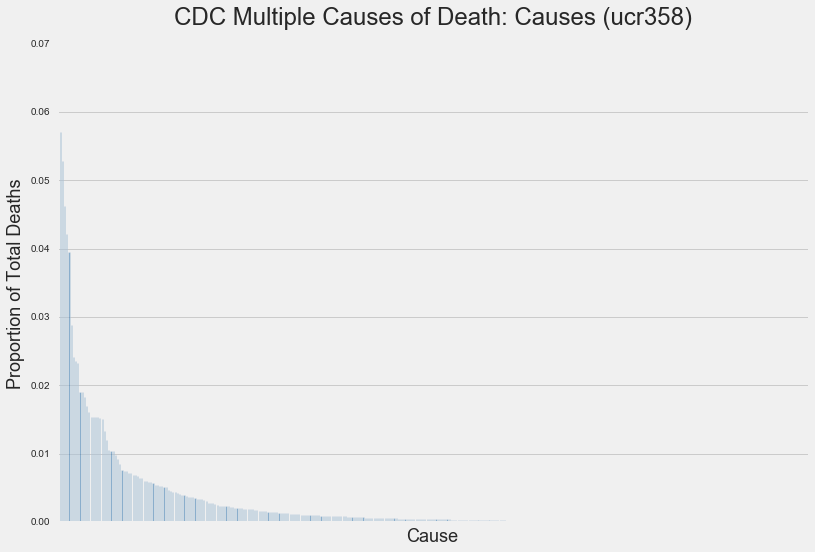

In [67]:
plt.figure(figsize = (12, 8))

causes = pd.DataFrame(mort['ucr358'].value_counts()/len(mort))
causes.columns = ['proportion']

causes['proportion'].plot.bar(color = 'steelblue', alpha = 0.6)

plt.title('CDC Multiple Causes of Death: Causes (ucr358)', fontsize = 24, y = 1.03)

plt.xlabel('Cause', fontsize = 18)
plt.xticks([])

plt.ylabel('Proportion of Total Deaths', fontsize = 18)

plt.grid(which='major', axis = 'x')

plt.show()

In [68]:
# mort.drop('ucr358', axis = 1, inplace = True)

###  UCR113

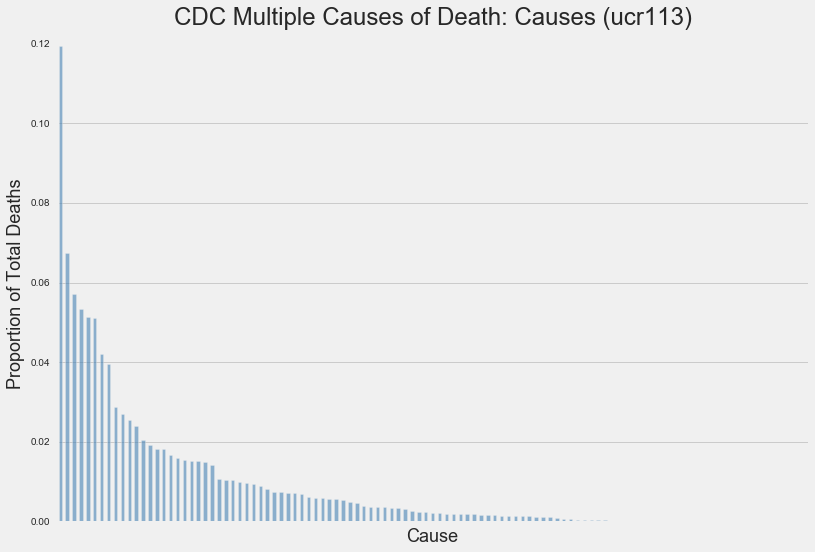

In [73]:
plt.figure(figsize = (12, 8))

causes = pd.DataFrame(mort['ucr113'].value_counts()/len(mort))
causes.columns = ['proportion']

causes['proportion'].plot.bar(color = 'steelblue', alpha = 0.6)

plt.title('CDC Multiple Causes of Death: Causes (ucr113)', fontsize = 24, y = 1.03)

plt.xlabel('Cause', fontsize = 18)
plt.xticks([])

plt.ylabel('Proportion of Total Deaths', fontsize = 18)

plt.grid(which='major', axis = 'x')

plt.show()

In [74]:
# mort.drop('ucr113', axis = 1, inplace = True)

### UCR130

In [75]:
mort['ucr130'].value_counts()

Series([], Name: ucr130, dtype: int64)

In [76]:
mort.drop('ucr130', axis = 1, inplace = True)

### UCR39

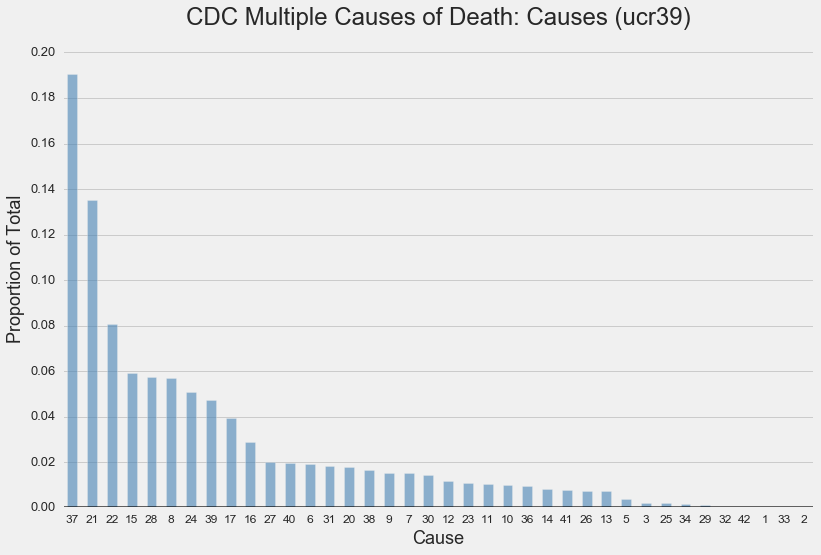

In [77]:
plt.figure(figsize = (12, 8))

causes = pd.DataFrame(mort['ucr39'].value_counts()/len(mort))
causes.columns = ['proportion']

causes['proportion'].plot.bar(color = 'steelblue', alpha = 0.6)

plt.title('CDC Multiple Causes of Death: Causes (ucr39)', fontsize = 24)

plt.xlabel('Cause', fontsize = 18)
plt.xticks(fontsize = 12, rotation = 0)

plt.ylabel('Proportion of Total', fontsize = 18)
plt.yticks(np.arange(0, 0.22, 0.02), fontsize = 13)
plt.ylim([0, 0.21])

plt.grid(which='major', axis = 'x')

plt.axhline(0, color = 'k', lw = 5, alpha = 0.6)

plt.show()

## Entity-axis

### eanum

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Number of entity-axis conditions (e.g., most observations have 2, three observations have 15):

In [78]:
mort['eanum'].value_counts()

2     482208
1     472591
3     443729
4     303963
5     184090
6     105372
7      58132
8      31559
9      17475
10      9385
11      5041
12      2613
13      1116
14       859
15         3
Name: eanum, dtype: int64

In [79]:
mort.drop('eanum', axis = 1, inplace = True)

### Other entity-axis condition of death columns

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"Position 1: Part/line number on certificate"

In [80]:
for i in range(1, 16):
    try:
        mort.drop('econdp_{}'.format(i), axis = 1, inplace = True)
    except:
        pass

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"Position 2: Sequence of condition within part/line"

In [81]:
for i in range(1, 16):
    try:
        mort.drop('econds_{}'.format(i), axis = 1, inplace = True)
    except:
        pass

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Entity-axis condition code:

In [82]:
listy = []
for i in range(1, 16):
    listy.extend(list(mort.loc[:, 'enicon_{}'.format(i)].value_counts().index))
    mort.drop('enicon_{}'.format(i), axis = 1, inplace = True)

In [83]:
len(set(listy))

5029

## Record-axis

### ranum

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Number of record-axis conditions:

In [84]:
mort['ranum'].value_counts()

2     521287
1     500624
3     438358
4     295914
5     171834
6      92481
7      48428
8      24855
9      12815
10      6322
11      3096
12      1420
13       530
14       166
15         6
Name: ranum, dtype: int64

In [85]:
mort.drop('ranum', axis = 1, inplace = True)

### Record-axis condition of death columns

In [86]:
listy2 = []
for i in range(1, 16):
    listy2.extend(list(mort.loc[:, 'record_{}'.format(i)].value_counts().index))

In [87]:
len(set(listy2))

5121

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Codes in entity-axis but not record-axis:

In [88]:
np.array(list(set(listy2) - set(listy)))

array(['I088', 'M804', 'I083', 'I081', 'J371', 'F178', 'E678', 'F177',
       'F174', 'F175', 'F197', 'F051', 'K252', 'K414', 'B190', 'B218',
       'B200', 'B201', 'N131', 'B204', 'B205', 'A427', 'B207', 'B208',
       'B209', 'M808', 'A212', 'N110', 'J703', 'K404', 'N202', 'J661',
       'E129', 'E125', 'E127', 'E120', 'E121', 'E122', 'B213', 'B212',
       'B211', 'B210', 'B217', 'A022', 'B219', 'F117', 'E45', 'J108',
       'K276', 'K270', 'I052', 'E134', 'E132', 'B227', 'D511', 'D862',
       'J65', 'B814', 'N130', 'I130', 'K262', 'E103', 'E100', 'E106',
       'K461', 'G218', 'B238', 'B231', 'B232', 'F134', 'E851', 'E117',
       'E116', 'O056', 'E113', 'J458', 'O11', 'M433', 'E051', 'K352',
       'B381', 'A527', 'E841', 'E848', 'I352', 'I062', 'M800', 'F154',
       'K718', 'M500', 'K717', 'K286', 'K804', 'F54', 'B162', 'O038',
       'Q378', 'O035', 'O036', 'M511', 'M068', 'B780', 'E111'], 
      dtype='|S4')

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Codes in record axis but not in entity-axis:

In [90]:
np.array(list(set(listy) - set(listy2)))

array(['Q669', 'D861', 'M434', 'O084', 'C463', 'Q360', 'O981', 'I068',
       'O080', 'O985', 'A549'], 
      dtype='|S4')

### Race

"This item is: 

a) the reported race for States that are reporting single race or 

b) the bridged race for States that are reporting multiple race. 

Beginning with 1992 data, some areas started reporting additional Asian or Pacific Islander codes for race. Codes 18 - 68 replace old code 08 for these areas. Code 78 replaces old 08 for all other areas. For consistency with Census races, the category all other races has been imputed.

US Occurrence

01 ... White

02 ... Black

03 ... American Indian (includes Aleuts and Eskimos)

04 ... Chinese

05 ... Japanese

06 ... Hawaiian (includes Part-Hawaiian)

07 ... Filipino

18 ... Asian Indian

28 ... Korean

38 ... Samoan

48 ... Vietnamese

58 ... Guamanian

68 ... Other Asian or Pacific Islander in areas reporting codes 18-58

78 ... Combined other Asian or Pacific Islander, includes codes 18-68 for areas that do not report them separately"

In [91]:
mort['race'].value_counts()

1     1820976
2      242823
3       15868
4        7188
18       5720
7        5701
5        5314
68       4853
28       2963
48       2918
78       2503
6         609
38        435
58        265
Name: race, dtype: int64

In [92]:
## REDO THIS
## mort = mort[(mort['race'] != 68) & (mort['race'] != 78)]

In [93]:
## len(mort)/float(orig_len)

In [94]:
# race_dict = {
    
#     1 : 'white',
#     2 : 'black',
#     3 : 'american_indian',
#     4 : 'chinese',
#     5 : 'japanese',
#     6 : 'hawaiian',
#     7 : 'filipino',
#     18 : 'asian_indian',
#     28 : 'korean',
#     38 : 'samoan',
#     48 : 'vietnamese',
#     58 : 'guamanian'
# }

# mort.loc[:, 'race'] = [race_dict[x] for x in mort.loc[:, 'race']]

### Imputed Race

In [95]:
mort['raceimp'].value_counts()

2.0    14817
1.0     2663
Name: raceimp, dtype: int64

In [96]:
mort.drop('raceimp', axis = 1, inplace = True)

### Bridged race

[background reading](https://www.cdc.gov/nchs/nvss/bridged_race.htm)

In [97]:
mort['brace'].value_counts()

1.0    8652
Name: brace, dtype: int64

In [98]:
set(mort.loc[mort['brace'] == 1, 'race'].values)

{1, 2, 3, 78}

In [99]:
mort.drop('brace', axis = 1, inplace = True)

### Race recode 3

Race Recode 3

1 ... White

2 ... Races other than White or Black

3 ... Black 

In [100]:
mort['racer3'].value_counts()

1    1820976
3     242823
2      54337
Name: racer3, dtype: int64

In [101]:
race3_dict = {
    1 : 'white_3',
    2 : 'other_3',
    3 : 'black_3'
}

mort.loc[:, 'racer3'] = [race3_dict[x] for x in mort.loc[:, 'racer3']]

### Race recode 5

0 … Other (Puerto Rico only)

1 ... White

2 ... Black

3 ... American Indian

4 ... Asian or Pacific Islander

In [102]:
mort['racer5'].value_counts()/len(mort)

1    0.859707
2    0.114640
4    0.018162
3    0.007491
Name: racer5, dtype: float64

In [103]:
race5_dict = {
    0 : 'other_PRonly',
    1 : 'white',
    2 : 'black',
    3 : 'amer_indian',
    4 : 'asian/PI'
}

mort.loc[:, 'racer5'] = [race5_dict[x] for x in mort.loc[:, 'racer5']]

## Box plots: Age of Death 

In [104]:
len(mort)/float(orig_len)

0.7792427188894996

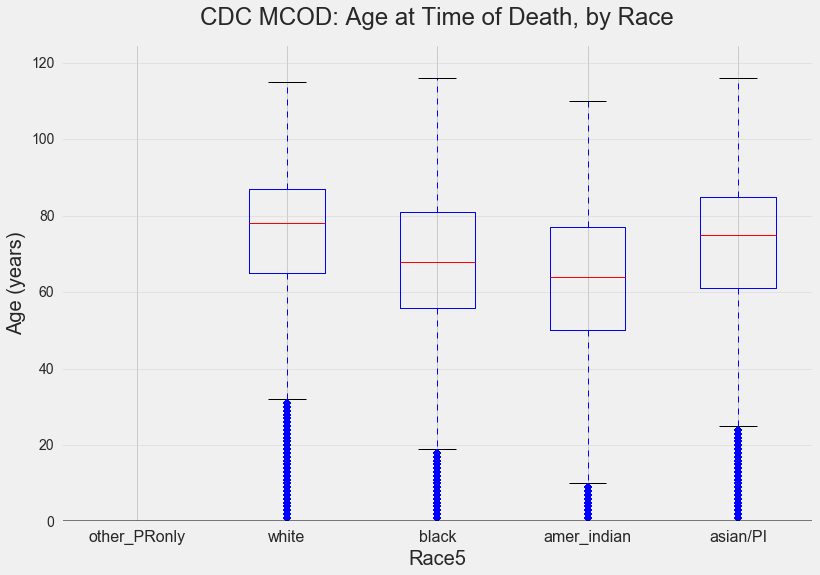

In [105]:
plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))

data = []
for i in race5_dict.values():
    data.append(mort.loc[mort['racer5'] == i, 'age'])

plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('CDC MCOD: Age at Time of Death, by Race', y = 1.03, fontsize = 24)
ax1.set_xlabel('Race5', fontsize = 20)
ax1.set_ylabel('Age (years)', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = len(race5_dict.keys())
ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(0, 125)
xtickNames = plt.setp(ax1, xticklabels = race5_dict.values())
plt.setp(xtickNames, fontsize=16)
ytickNames = plt.setp(ax1, yticklabels=range(0, 140, 20))
plt.setp(ytickNames, fontsize=14)

plt.axhline(0, color='black', alpha = 0.5)

del data

plt.show()

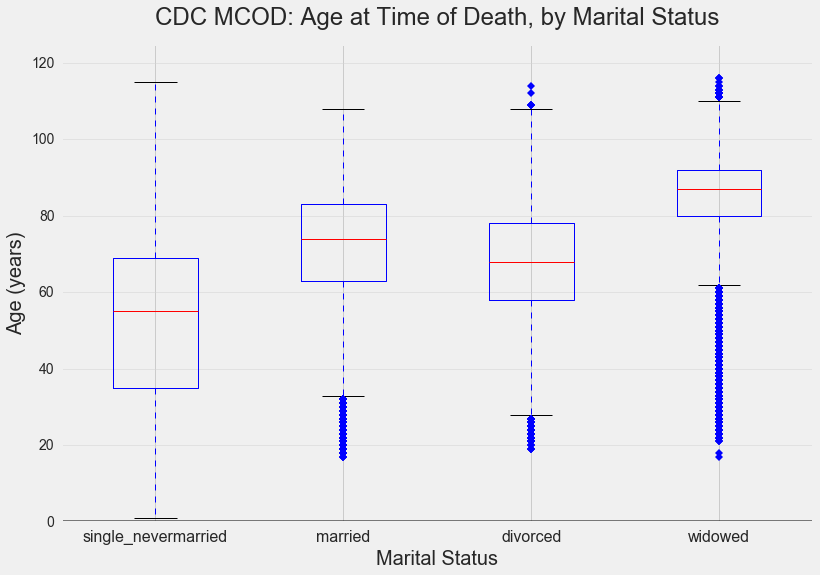

In [106]:
plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))

data = []
for i in marstat_dict.values():
    data.append(mort.loc[mort['marstat'] == i, 'age'])

plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('CDC MCOD: Age at Time of Death, by Marital Status', y = 1.03, fontsize = 24)
ax1.set_xlabel('Marital Status', fontsize = 20)
ax1.set_ylabel('Age (years)', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = len(marstat_dict.keys())
ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(0, 125)
xtickNames = plt.setp(ax1, xticklabels = marstat_dict.values())
plt.setp(xtickNames, fontsize=16)
ytickNames = plt.setp(ax1, yticklabels=range(0, 140, 20))
plt.setp(ytickNames, fontsize=14)

plt.axhline(0, color='black', alpha = 0.5)

del data

plt.show()

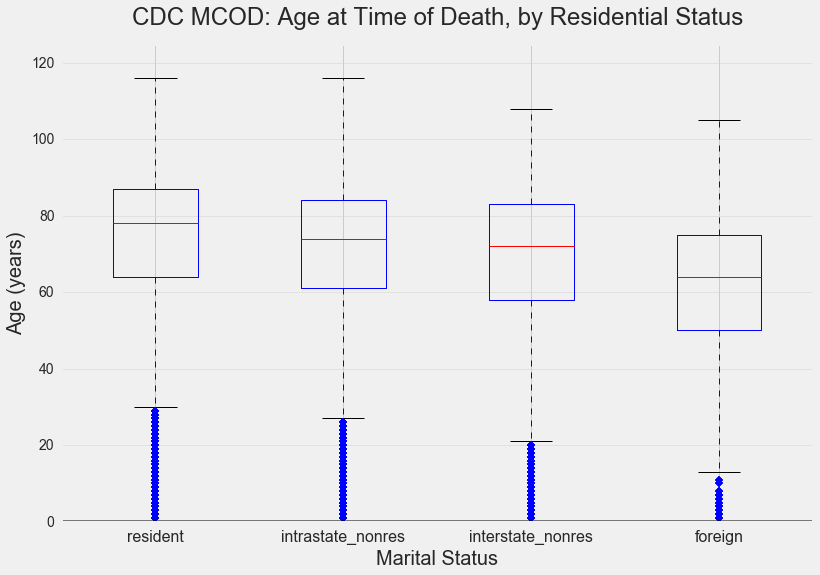

In [107]:
plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))

data = []
for i in res_dict.values():
    data.append(mort.loc[mort['restatus'] == i, 'age'])

plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('CDC MCOD: Age at Time of Death, by Residential Status', y = 1.03, fontsize = 24)
ax1.set_xlabel('Marital Status', fontsize = 20)
ax1.set_ylabel('Age (years)', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = len(res_dict.keys())
ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(0, 125)
xtickNames = plt.setp(ax1, xticklabels = res_dict.values())
plt.setp(xtickNames, fontsize=16)
ytickNames = plt.setp(ax1, yticklabels=range(0, 140, 20))
plt.setp(ytickNames, fontsize=14)

plt.axhline(0, color='black', alpha = 0.5)

del data

plt.show()

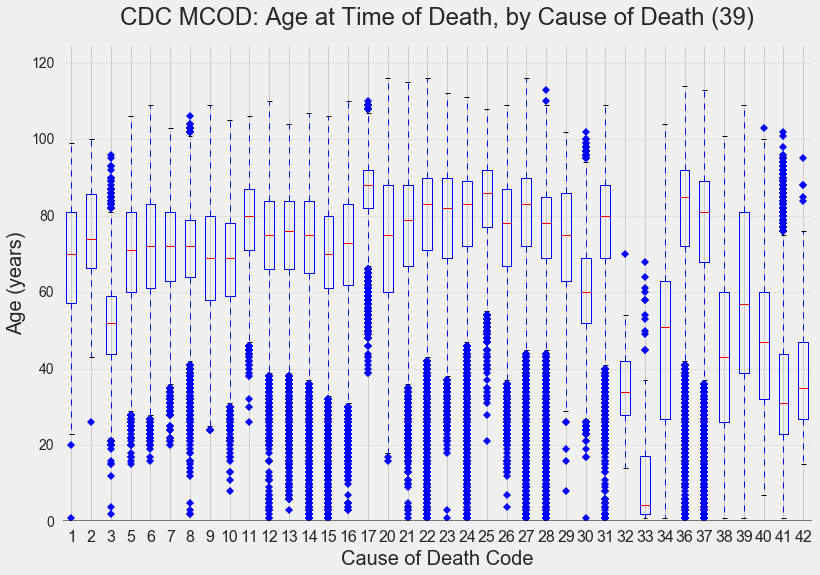

In [108]:
plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))

data = []
for i in set(mort['ucr39']):
    data.append(mort.loc[mort['ucr39'] == i, 'age'])

plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('CDC MCOD: Age at Time of Death, by Cause of Death (39)', y = 1.03, fontsize = 24)
ax1.set_xlabel('Cause of Death Code', fontsize = 20)
ax1.set_ylabel('Age (years)', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = len(set(mort['ucr39']))
ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(0, 125)
xtickNames = plt.setp(ax1, xticklabels = list(set(mort['ucr39'])))
plt.setp(xtickNames, fontsize=16)
ytickNames = plt.setp(ax1, yticklabels=range(0, 140, 20))
plt.setp(ytickNames, fontsize=14)

plt.axhline(0, color='black', alpha = 0.5)

del data

plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;lookup codes: https://www.cdc.gov/nchs/data/dvs/multiple_cause_record_layout_2015.pdf

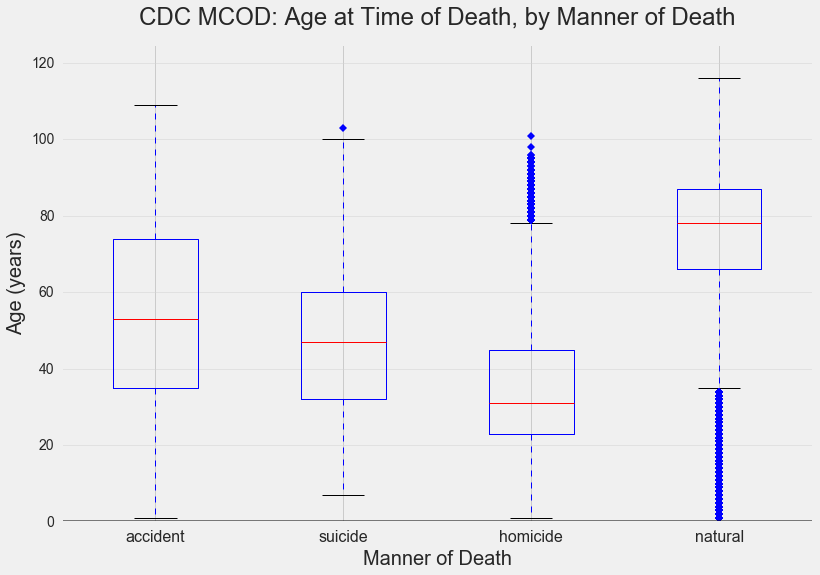

In [109]:
plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))

data = []
for i in mandeath_dict.values():
    data.append(mort.loc[mort['mandeath'] == i, 'age'])

plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('CDC MCOD: Age at Time of Death, by Manner of Death', y = 1.03, fontsize = 24)
ax1.set_xlabel('Manner of Death', fontsize = 20)
ax1.set_ylabel('Age (years)', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = len(mandeath_dict.keys())
ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(0, 125)
xtickNames = plt.setp(ax1, xticklabels = mandeath_dict.values())
plt.setp(xtickNames, fontsize=16)
ytickNames = plt.setp(ax1, yticklabels=range(0, 140, 20))
plt.setp(ytickNames, fontsize=14)

plt.axhline(0, color='black', alpha = 0.5)

del data

plt.show()

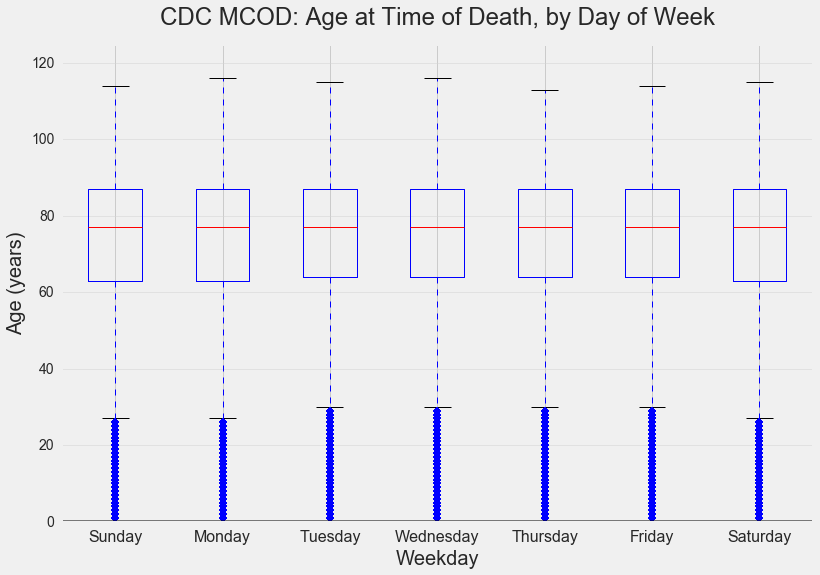

In [110]:
plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))

data = []
for i in weekday_dict.values():
    data.append(mort.loc[mort['weekday'] == i, 'age'])

plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('CDC MCOD: Age at Time of Death, by Day of Week', y = 1.03, fontsize = 24)
ax1.set_xlabel('Weekday', fontsize = 20)
ax1.set_ylabel('Age (years)', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = len(weekday_dict.keys())
ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(0, 125)
xtickNames = plt.setp(ax1, xticklabels = weekday_dict.values())
plt.setp(xtickNames, fontsize=16)
ytickNames = plt.setp(ax1, yticklabels=range(0, 140, 20))
plt.setp(ytickNames, fontsize=14)

plt.axhline(0, color='black', alpha = 0.5)

del data

plt.show()

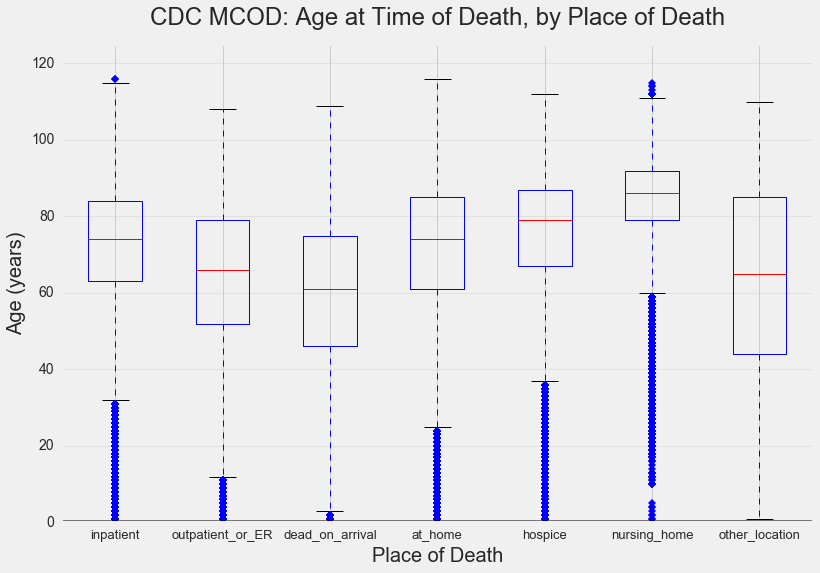

In [112]:
plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))

data = []
for i in placdth_dict.values():
    data.append(mort.loc[mort['placdth'] == i, 'age'])

plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('CDC MCOD: Age at Time of Death, by Place of Death', y = 1.03, fontsize = 24)
ax1.set_xlabel('Place of Death', fontsize = 20)
ax1.set_ylabel('Age (years)', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = len(placdth_dict.keys())
ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(0, 125)
xtickNames = plt.setp(ax1, xticklabels = placdth_dict.values())
plt.setp(xtickNames, fontsize=13)
ytickNames = plt.setp(ax1, yticklabels=range(0, 140, 20))
plt.setp(ytickNames, fontsize=14)

plt.axhline(0, color='black', alpha = 0.5)

del data

plt.show()

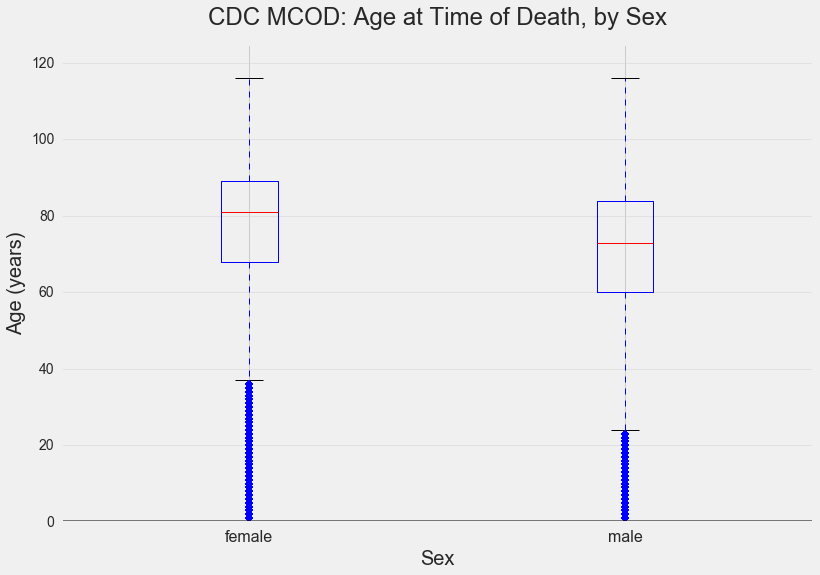

In [113]:
plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))

data = []
for i in [0, 1]:
    data.append(mort.loc[mort['sex'] == i, 'age'])

plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('CDC MCOD: Age at Time of Death, by Sex', y = 1.03, fontsize = 24)
ax1.set_xlabel('Sex', fontsize = 20)
ax1.set_ylabel('Age (years)', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = 2
ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(0, 125)
xtickNames = plt.setp(ax1, xticklabels = ['female', 'male'])
plt.setp(xtickNames, fontsize=16)
ytickNames = plt.setp(ax1, yticklabels=range(0, 130, 20))
plt.setp(ytickNames, fontsize=14)

plt.axhline(0, color='black', alpha = 0.5)

del data

plt.show()

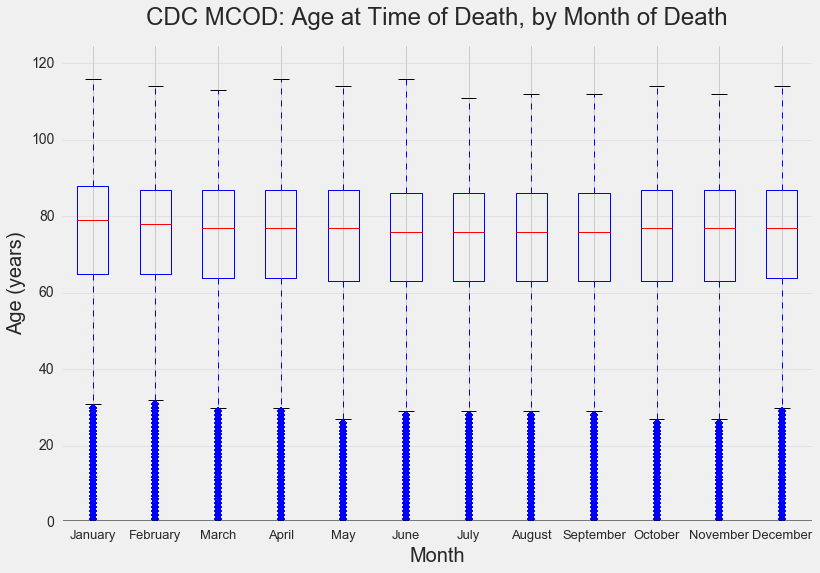

In [115]:
plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))

data = []
for i in monthdth.index:
    data.append(mort.loc[mort['monthdth'] == i, 'age'])

plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('CDC MCOD: Age at Time of Death, by Month of Death', y = 1.03, fontsize = 24)
ax1.set_xlabel('Month', fontsize = 20)
ax1.set_ylabel('Age (years)', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = len(monthdth)
ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(0, 125)
xtickNames = plt.setp(ax1, xticklabels = monthdth.index)
plt.setp(xtickNames, fontsize=13)
ytickNames = plt.setp(ax1, yticklabels=range(0, 140, 20))
plt.setp(ytickNames, fontsize=14)

plt.axhline(0, color='black', alpha = 0.5)

del data

plt.show()

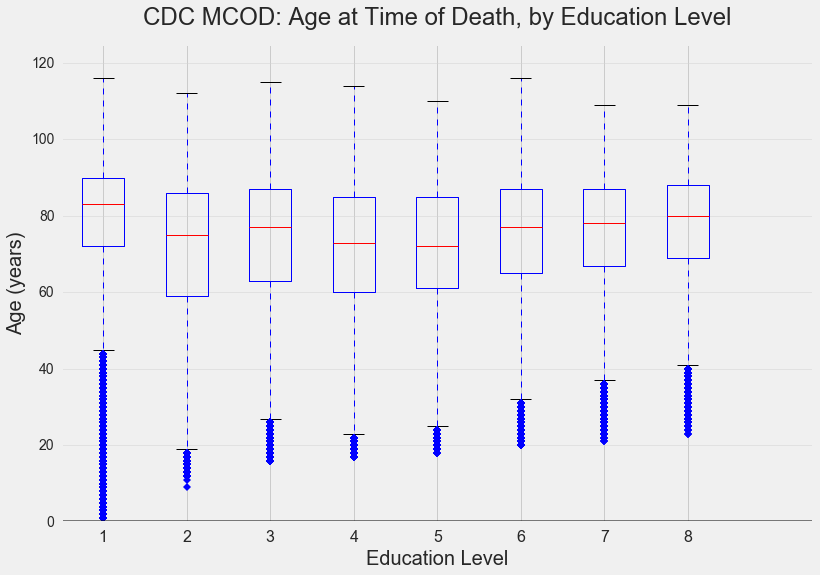

In [117]:
plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))

data = []
for i in range(1, 9):
    data.append(mort.loc[mort['educ2003'] == i, 'age'])

plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('CDC MCOD: Age at Time of Death, by Education Level', y = 1.03, fontsize = 24)
ax1.set_xlabel('Education Level', fontsize = 20)
ax1.set_ylabel('Age (years)', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = len(range(0, 9))
ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(0, 125)
xtickNames = plt.setp(ax1, xticklabels = range(1, 9))
plt.setp(xtickNames, fontsize=16)
ytickNames = plt.setp(ax1, yticklabels=range(0, 140, 20))
plt.setp(ytickNames, fontsize=14)

plt.axhline(0, color='black', alpha = 0.5)

del data

plt.show()

## Preprocessing

In [119]:
preX = mort[[u'restatus', u'educ2003', u'monthdth', u'sex', u'age', u'placdth', u'marstat', u'weekday', \
             u'mandeath', u'ucr39', u'racer5']]

In [120]:
def dummies(my_df, cols):
    '''For a dataframe and list of (<column name>, <dummy prefix>) tuples, 
    this function will dummify the columns listed and name the dummies using the prefix'''
    for column in cols:
        my_df = pd.concat([my_df.drop(column[0], axis = 1), pd.get_dummies(my_df[column[0]], \
                    drop_first = False, prefix = column[1])], axis = 1)
    return my_df

In [121]:
cols = [(u'restatus', None), (u'educ2003', 'educ'), (u'monthdth', None), (u'placdth', None), (u'marstat', None), \
        (u'weekday', None), (u'mandeath', None), (u'ucr39', 'cause'), (u'racer5', None)]

preX = dummies(preX, cols)

X = pd.DataFrame(MinMaxScaler().fit_transform(preX), columns = preX.columns)

In [122]:
X.columns

Index([u'sex', u'age', u'foreign', u'interstate_nonres', u'intrastate_nonres',
       u'resident', u'educ_1.0', u'educ_2.0', u'educ_3.0', u'educ_4.0',
       u'educ_5.0', u'educ_6.0', u'educ_7.0', u'educ_8.0', u'April', u'August',
       u'December', u'February', u'January', u'July', u'June', u'March',
       u'May', u'November', u'October', u'September', u'at_home',
       u'dead_on_arrival', u'hospice', u'inpatient', u'nursing_home',
       u'other_location', u'outpatient_or_ER', u'divorced', u'married',
       u'single_nevermarried', u'widowed', u'Friday', u'Monday', u'Saturday',
       u'Sunday', u'Thursday', u'Tuesday', u'Wednesday', u'accident',
       u'homicide', u'natural', u'suicide', u'cause_1', u'cause_2', u'cause_3',
       u'cause_5', u'cause_6', u'cause_7', u'cause_8', u'cause_9', u'cause_10',
       u'cause_11', u'cause_12', u'cause_13', u'cause_14', u'cause_15',
       u'cause_16', u'cause_17', u'cause_20', u'cause_21', u'cause_22',
       u'cause_23', u'cause_24', u'c

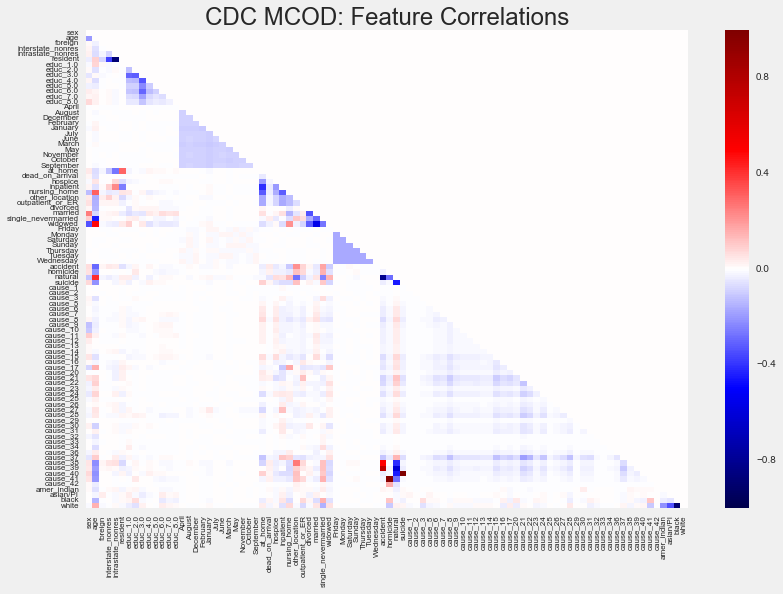

In [123]:
plt.figure(figsize = (12, 8))
corr_mat = np.tril(X.corr(), k=-1)
sns.heatmap(corr_mat, cmap = 'seismic')
plt.title('CDC MCOD: Feature Correlations', fontsize = 24)
plt.xticks(np.arange(0.5, len(X.columns) + 0.5, 1), X.columns, fontsize = 8, rotation = 90)
plt.yticks(np.arange(0.5, len(X.columns) + 0.5, 1), list(X.columns)[::-1], fontsize = 8, rotation = 0)
plt.show()

In [125]:
X.head()

,sex,age,foreign,interstate_nonres,intrastate_nonres,resident,educ_1.0,educ_2.0,educ_3.0,educ_4.0,...,cause_37,cause_38,cause_39,cause_40,cause_41,cause_42,amer_indian,asian/PI,black,white
0,1.0,0.721739,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.600000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.782609,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.339130,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.765217,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [124]:
X.to_csv('assets/mort_featureset_RENAME_ME.csv', index = False)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Please go to 'Analysis' notebook.  Final featureset on S3 [here](https://s3.amazonaws.com/cdc-mortality/mort_featureset.csv). 